## l. Introduction

### 1. Identify a domain specific area:

#### Bioinformatics:

As an interdisciplinary field that utilises software tools to analyse biological data, bioinformatics has emerged as a crucial tool in developing insights, specifically into larger datasets that have become more numerous with the development of computer storage, processing power and means of collecting and analysing data across the fields of biology, chemistry, physics, computer science, mathematics and statistics.

Some of the most noteworthy examples of bioinformatics exist in the field of genomics, where DNA sequencing has created wide ranging implications for the study of disease, human health and longevity. 

#### Bioinformatics used in Diabetes research

Diabetes is threatening to become an epidemic of global proportions. In the United Kingdom alone, currently 4.8 million people have been diagnosed with diabetes with this number expected to climb to 5.5 million by 2030.
(ref. https://www.diabetes.org.uk/professionals/position-statements-reports/statistics)

The production of a regression model that takes various biological markers as independent variables and determines the probability that an individual is or is likely to be diabetic in the future, could be used in diagnoses and as an early warning system to allow subjects to implement certain bahavioural changes to increase the chance of a positive outcome, leading to greater longevity and a reduction of strain on health services.

### 2. Dataset:
 
In order to attempt to satisfy the premise outlined above, the dataset needs to contain measurements of several biological markers that are posessed by subjects of the study that either have or do not have diabetes.

Originally from the National Institute of Diabetes and Digestive and Kidney Diseases, this dataset was obtained from Kaggle
https://www.kaggle.com/datasets/mathchi/diabetes-data-set

It is not clear from the dataset if the outcomes as either diabetic or not diabetic were at the time of observation for the other columns in the dataset, or were recorded during follow up examinations. Without this information, the data may not provide predictive characteristics of whether an individual may develop diabetes if they currently do not have it, but this does not affect the ability of the data to train a model to predict if an individual has or does not have diabetes.

The subjects of this dataset were all females of at least 21 years old, and of Pima Indian heritage. Any conclusions drawn from the analysis of this dataset should remain cognisant of the focused demographic within the dataset, and wider generalisations about differeing demographics should be made with caution.

### 3. Objectives of the Project

Early diagnosis of any medical condition can dramatically increase the chance of a positive outcome. This project will attempt to create a predictive regression model take certain bio-markers as input and make a prediction with reasonable accuracy of either diabetic or not diabetic. The limitations of this project, such as the imited number and demographic of the test subjects, as well as the limited number of biomarkers observed and used as independent variables means that the model is more likely to act as a proof of concept, rather than a wholly effective predictor.

With more data, more test subjects from a wider cross-section of culture and genetics, and a wider selection of predictive modelling techniques, a model with greater efficacy should be possible by following the general principles set out in this project.

## ll. Implementation

### 4. Convert / store dataset locally and preprocess the data

#### Import pandas library for creating dataframe
 - the data will be held locally in a pandas dataframe, using pandas read_csv method

In [1]:
import pandas as pd

In [2]:
# create and check dataframe
df = pd.read_csv('data/diabetes.csv')

# check the first 10 rows of data
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


#### The table appears to comply with 1NF, 2NF and 3NF:
There is a single primary key, no duplication of data and no transitive dependencies.

### Database overview:
 - Pregnancies: Number of times pregnant
 - Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
 - BloodPressure: Diastolic blood pressure (mm Hg)
 - SkinThickness: Triceps skin fold thickness (mm)
 - Insulin: 2-Hour serum insulin (mu U/ml)
 - BMI: Body mass index (weight in kg/(height in m)^2)
 - DiabetesPedigreeFunction: Diabetes pedigree function
 - Age: Age (years)
 - Outcome: (Class variable) 1 = positive for diabetes, 0 = negative for diabetes

#### Determine the shape of the data

In [3]:
# get the number of rows (records) and columns (dependent variables)
df.shape

(768, 9)

The data has <b>768 records</b> and <b>9 fields</b>

#### Check for null / na values

In [4]:
# check if any na values exist
print(df.isna().any())

# create a blank line to separate print statements
print()

# check if any null values exist
print(df.isnull().any())

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool


#### There are no null/na values in any fields of the database

#### Generate some descriptive statistics about the database including:
 - central tendency
 - dispersion
 - standard deviation
 - mean values
 - max values

In [5]:
# print out an overview of descriptive statistics about the dataset
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
df.shape

(768, 9)

#### Import matplotlib and seaborn for data visualisation
The inline backend embeds the plots directly into the notebook

In [7]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

#### Get a feel for the data through visualisation

#### Check if the dataset is balanced in terms of outcomes

0    500
1    268
Name: Outcome, dtype: int64

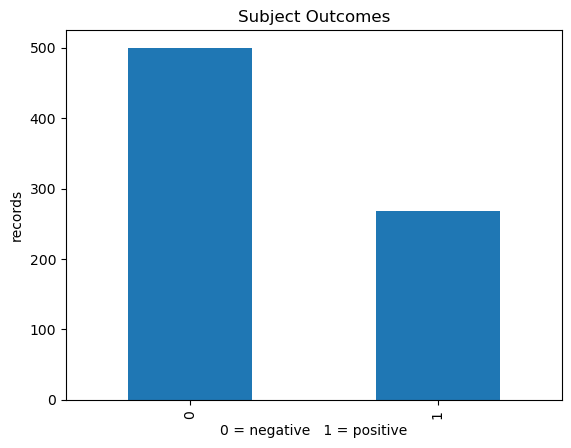

In [15]:
# create a pandas series object
counts = df['Outcome'].value_counts()

# plot bar chart showing outcomes
outcomes = counts.plot(kind='bar', )
outcomes.set_title('Subject Outcomes')
outcomes.set_xlabel('0 = negative   1 = positive')
outcomes.set_ylabel('records')

# show the number of positive and negative outcomes
counts

#### The dataset has significantly higher negative than positive diabetes disgnoses

In [34]:
# sns.displot(data = df_balanced, kde=True, x=df_balanced['Glucose'], hue='Outcome', palette = {0: 'blue', 1: 'red'})

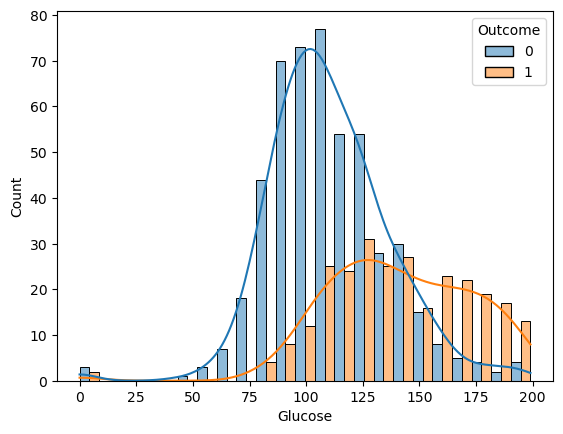

In [42]:
sns.histplot(data = df_balanced, x=df['Glucose'], hue=df['Outcome'], multiple ='dodge', kde=True)

#### The first 8 columns are independent variables, and the 'outcome' column is the target to predict, or the 'y' variable in the regression model

In [52]:
# establish a list of feature names, and delete 'outcome'
features = list(df)
features.remove('Outcome')
print(features)

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


In [59]:
df.corr().sort_values('Outcome', ascending=False)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068


In [7]:
# assign the x and y variables
x = diabetes.data
y = diabetes.target

In [11]:
# check the rows and columns of x and y
x.shape, y.shape

((442, 10), (442,))

#### Identify key series of the dataset and provide statistical summary of the data, including:
 - measures of central tendency
 - measures of spread
 - type of distribution

##### Import module necessary for data split

In [14]:
from sklearn.model_selection import train_test_split

In [25]:
# initialise data into an 80/20 split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [26]:
x_train.shape, y_train.shape

((353, 10), (353,))

In [27]:
x_test.shape, y_test.shape

((89, 10), (89,))

##### Import modules necessary for creating the regression model

In [47]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import linear_model

Define the regression model

In [30]:
model = linear_model.LinearRegression()

Build the training model

In [31]:
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Use the trained model to make predicions on the test set

In [32]:
y_pred = model.predict(x_test)

#### Create dictionary of dependent variables and their respective coefficients

In [56]:
# initiate dictionary
coeff_dict = {}

# assign the variables and respective coefficient values
for i, coeff in enumerate(model.coef_):
    coeff_dict[diabetes.feature_names[i]] = coeff


In [57]:
coeff_dict

{'age': -5.553229707287754,
 'sex': -272.603425451895,
 'bmi': 568.5898783527225,
 'bp': 321.8981842125007,
 's1': -495.9208158106599,
 's2': 229.91778806747158,
 's3': -36.211586699922094,
 's4': 115.14349453528206,
 's5': 692.8391512384989,
 's6': 10.577732645385591}

##### Print out the model performance

In [62]:
print(f"Intercept: {model.intercept_}\n")
print(f"Mean Squared Error: {mean_squared_error(y_test,y_pred)}\n")
print(f"Coefficient of determination (R^2): {r2_score(y_test, y_pred)}\n")
print(f"Coefficients: {coeff_dict}")

Intercept: 152.068188616067

Mean Squared Error: 2978.490792556882

Coefficient of determination (R^2): 0.3760946398545989

Coefficients: {'age': -5.553229707287754, 'sex': -272.603425451895, 'bmi': 568.5898783527225, 'bp': 321.8981842125007, 's1': -495.9208158106599, 's2': 229.91778806747158, 's3': -36.211586699922094, 's4': 115.14349453528206, 's5': 692.8391512384989, 's6': 10.577732645385591}


#### Import module for creating plot

In [63]:
import seaborn as sns

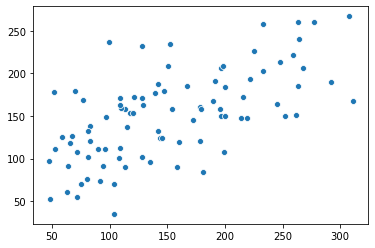

In [64]:
sns.scatterplot(y_test, y_pred)